In [29]:
#loading the librarires that we will need throughtout the notebook
import pandas as pd 
import numpy as np
import seaborn as sns
import xlrd
from datetime import datetime
import matplotlib.pyplot as plt



In [18]:
#loading the Cab Data dataset and seeing a description of it 
db = pd.read_csv('Cab_Data.csv')
#viewing the data  
db.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [19]:
#getting some basic information about the dataset
db.info()
db.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


It would be better to join some datasets together to make it easier to manipulate and visualize the needed parameters 

In [20]:
#reading the transaction id datasert and merging it with the Cab Data dataset
db1 = pd.read_csv('Transaction_ID.csv')
mergedDb = pd.merge(db,db1,on = 'Transaction ID', how="inner")
#checking how our newly merged dataset looks like 
mergedDb.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


Now we add details about the customer to the dataset by merging customer_Id to the mergedDb


In [21]:
#reading the Dataset 
db2 = pd.read_csv('Customer_ID.csv')
#merging the datasets and vizualizing the result
mergedDb = pd.merge(mergedDb,db2,on='Customer ID',how="inner")
mergedDb.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


Now we have most variables that we will be working on 

In [22]:
#we have to check the dataset for null values 
mergedDb.isnull().count()
#we can see from the result that the data is clean

Transaction ID        359392
Date of Travel        359392
Company               359392
City                  359392
KM Travelled          359392
Price Charged         359392
Cost of Trip          359392
Customer ID           359392
Payment_Mode          359392
Gender                359392
Age                   359392
Income (USD/Month)    359392
dtype: int64

In [23]:
#fixing the date variable in the db
mergedDb['Date of Travel'] = mergedDb['Date of Travel'].apply(lambda x: datetime.fromtimestamp((x - 25569) * 86400.0))


In [24]:
#replacing the date of travel column with two columns (month and year) in order to manipulate data easier 
months,years = [],[]
for i in range(len(mergedDb['Date of Travel'])):
    months.append(mergedDb['Date of Travel'][i].month)
    years.append(mergedDb['Date of Travel'][i].year)

#deleting the old date column and inserting month and year
mergedDb.drop('Date of Travel', axis=1, inplace=True)
mergedDb['Month'] = months
mergedDb['Year'] = years


In [25]:
#we should merge the city.csv dataset as well to our main dataset 
db3 =pd.read_csv('City.csv')
mergedDb = pd.merge(mergedDb,db3,on='City',how="inner")
#we should also make the column names more suitable 
for column in mergedDb.columns:
    if ' ' in column:
        mergedDb = mergedDb.rename(columns={column:column.replace(' ','_')})
mergedDb.head()
#we must also remove the semi-column in 


,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Month,Year,Population,Users
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,1,2016,"814,885","24,701"
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,7,2018,"814,885","24,701"
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,11,2018,"814,885","24,701"
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,1,2016,"814,885","24,701"
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,4,2018,"814,885","24,701"


In [26]:
#we must also remove the semi-column in the columns of Users and Population to treat them as integers
for column in ["Users","Population"] :
    
        mergedDb[column] = mergedDb[column].str.replace(',','')

<AxesSubplot:>

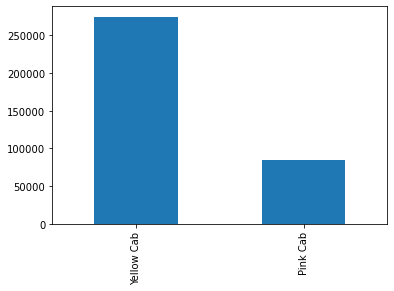

In [38]:
mergedDb['Company'].value_counts().plot.bar()
#the data shows that Yellow Cab has more transactions/trips than Pink Cab

In [115]:
plot0 = mergedDb[mergedDb.Company=='Pink Cab'].groupby(['Year']).Transaction_ID.count()
plot0

Year
2016    25080
2017    30321
2018    29310
Name: Transaction_ID, dtype: int64

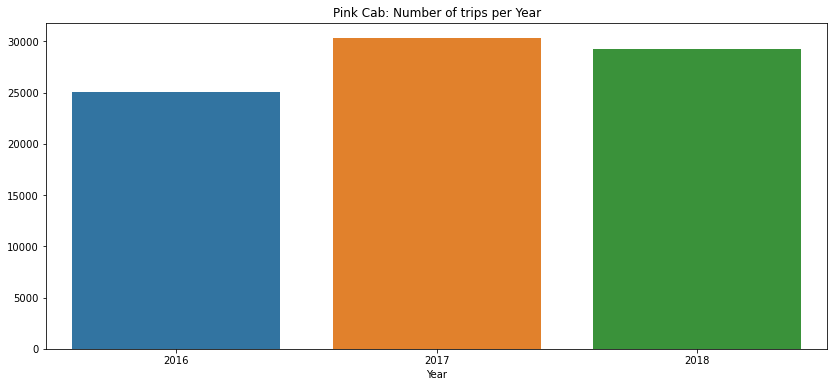

In [116]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot0.index,y=plot0.values)
plt.title('Pink Cab: Number of trips per Year')
plt.show()

In [57]:
plot1 = mergedDb[mergedDb.Company=='Yellow Cab'].groupby(['Year']).Transaction_ID.count()
plot1


Year
2016    82239
2017    98189
2018    94253
Name: Transaction_ID, dtype: int64

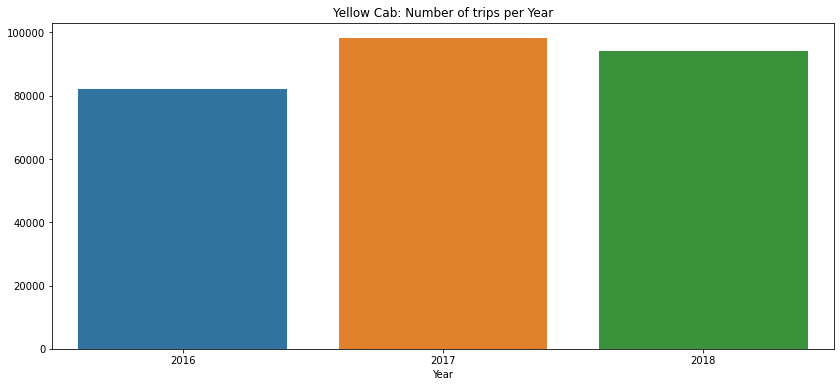

In [117]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot1.index,y=plot1.values)
plt.title('Yellow Cab: Number of trips per Year')
plt.show()

In [54]:
plot2 = mergedDb[mergedDb.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
plot2

Month
1      5057
2      3375
3      4223
4      4083
5      4960
6      5877
7      6590
8      7739
9      9658
10    10576
11    11005
12    11568
Name: Transaction_ID, dtype: int64

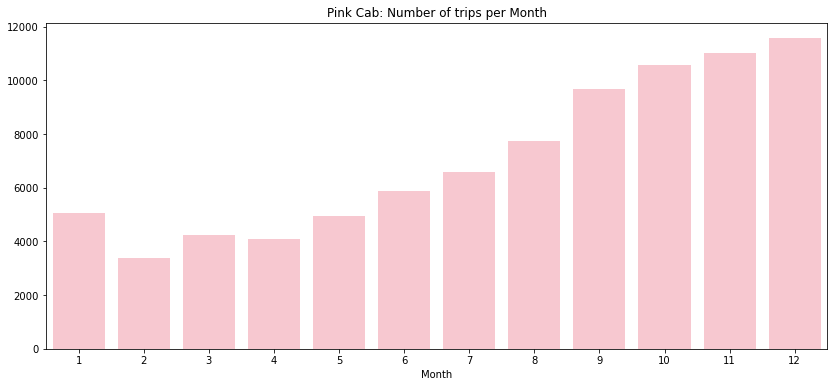

In [121]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot2.index,y=plot2.values,color='Pink')
plt.title('Pink Cab: Number of trips per Month')
plt.show()

In [62]:
plot3 = mergedDb[mergedDb.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
plot3

Month
1     18117
2     14932
3     17423
4     17351
5     18741
6     18836
7     21086
8     23584
9     27201
10    30276
11    31695
12    35439
Name: Transaction_ID, dtype: int64

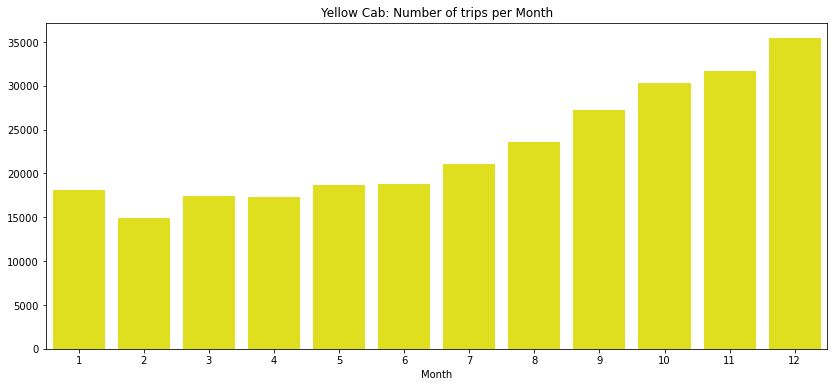

In [120]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot3.index,y=plot3.values,color='Yellow')
plt.title('Yellow Cab: Number of trips per Month')
plt.show()

In [65]:
mergedDb.dtypes

Transaction_ID          int64
Company                object
City                   object
KM_Travelled          float64
Price_Charged         float64
Cost_of_Trip          float64
Customer_ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income_(USD/Month)      int64
Month                   int64
Year                    int64
Population             object
Users                  object
dtype: object

In [67]:
mergedDb['Profit_per_trip'] = mergedDb['Price_Charged']- mergedDb['Cost_of_Trip']
mergedDb.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Month,Year,Population,Users,Profit_per_trip
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,1,2016,814885,24701,57.3150
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,7,2018,814885,24701,281.2772
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,11,2018,814885,24701,194.6480
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,1,2016,814885,24701,23.6660
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,4,2018,814885,24701,253.9808


In [68]:
#we can divide the dataset according to the company to make it easier to showcase each company 
YellowDb= mergedDb[mergedDb['Company']=='Yellow Cab']
PinkDb= mergedDb[mergedDb['Company']=='Pink Cab']


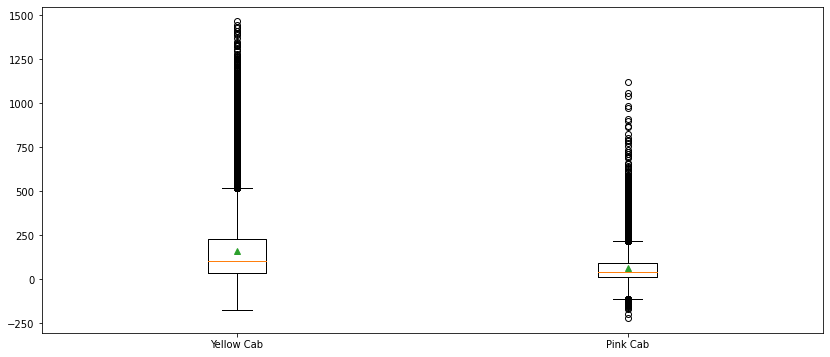

In [91]:
plot5 = [YellowDb['Profit_per_trip'],PinkDb['Profit_per_trip']]
plt.figure(figsize=(14,6))
# Creating plot
fig = plt.boxplot(plot5,labels=("Yellow Cab","Pink Cab"),showmeans=True)
plt.show()
# show plot



<BarContainer object of 2 artists>

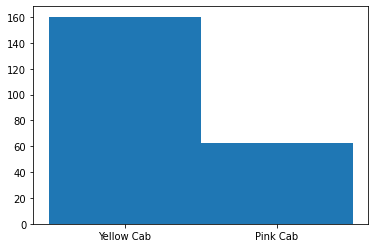

In [114]:
means = [np.mean(YellowDb['Profit_per_trip']),
         np.mean(PinkDb['Profit_per_trip'])]
fig, ax  = plt.subplots()
ax.bar([1, 2], [means[0], means[1]], width=1,
       tick_label=['Yellow Cab', 'Pink Cab'], align='center')


<Figure size 1440x720 with 0 Axes>

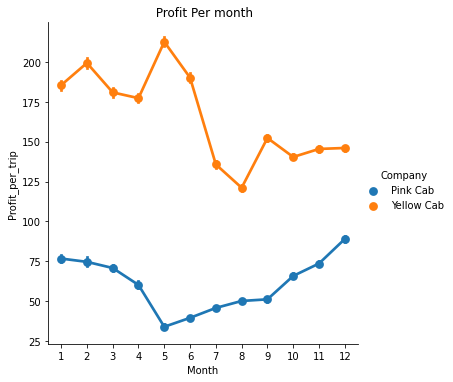

In [119]:
plt.figure(figsize=(20,10))
sns.catplot(x="Month",
            y="Profit_per_trip",
            hue="Company",
            kind="point", 
            data=mergedDb)
plt.title(" Profit Per month")

plt.show()

/home/hussein/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


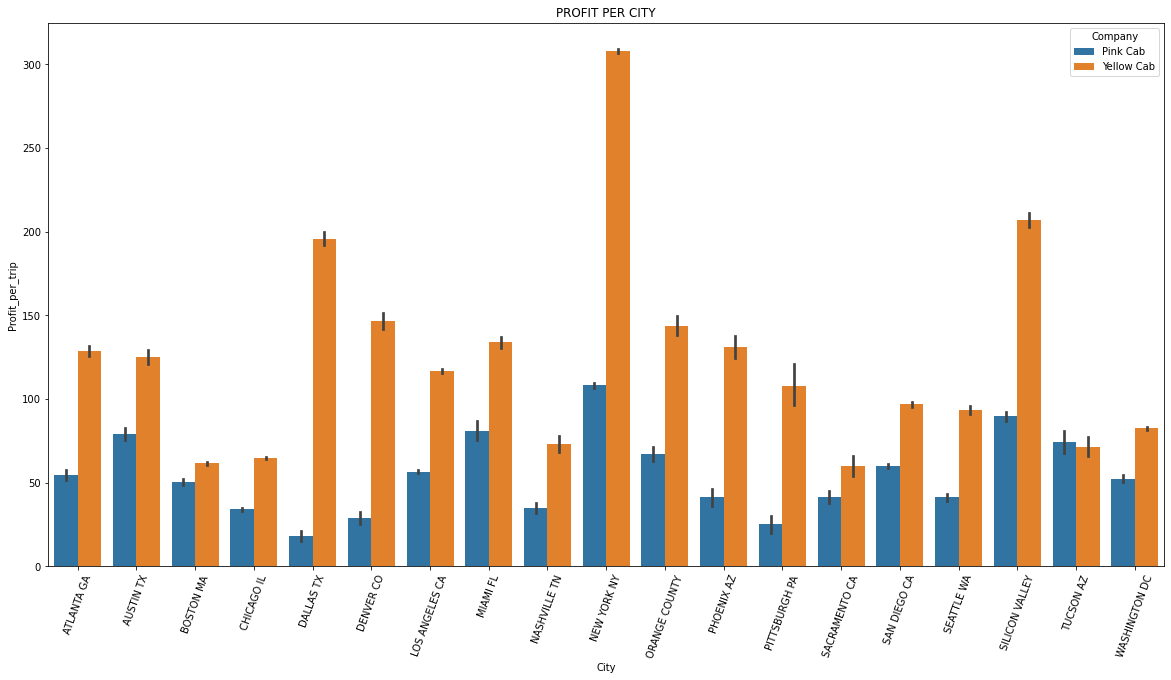

In [122]:
plt.figure(figsize=(20,10))
sns.barplot(mergedDb['City'],mergedDb['Profit_per_trip'], hue='Company',data=mergedDb)
xt = plt.xticks(rotation=70)
plt.title("PROFIT PER CITY")
plt.show()